##🎯 What You’ll Learn in This Video

✅ Calculate EVI using Sentinel-2 and Landsat8 with eemont

✅ Visualize EVI in interactive maps with geemap

###What is EVI (Enhanced Vegetation Index) ?
<div dir="rtl">

هو مقياس طيفي مُحسَّن يهدف إلى تحديد كثافة وحيوية الغطاء النباتي على سطح الأرض.

الهدف من التطوير: تم تطوير EVI بشكل أساسي للتغلب على قيود مؤشر NDVI، وهي:

- التشبع (Saturation): فقدان الحساسية في مناطق الغطاء النباتي الكثيف.

- التأثيرات البيئية (Environmental Noise): التشويه الناتج عن تأثيرات الغلاف الجوي وخلفية التربة.

###**المعادلة**

تعتمد قوة EVI على تضمين نطاق طيفي إضافي (الأزرق) وعوامل تصحيح ثابتة في المقام.

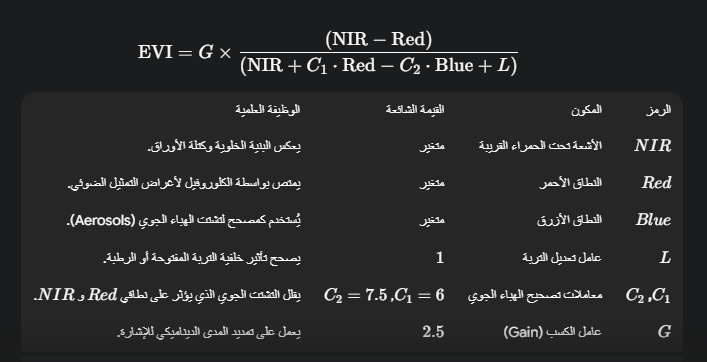

يتفوق EVI على NDVI من خلال آليتين علميتين رئيسيتين:

أ. تقليل التشبع والحساسية لكثافة المظلة (LAI)

- مشكلة NDVI: عندما تزداد مساحة الورقة (LAI) إلى مستويات عالية (في الغابات أو المحاصيل الناضجة)، يصبح الانعكاس في النطاق الأحمر قريباً من الصفر، مما يجعل مقام NDVI يقترب من البسط، فتثبت قيمة NDVI (تتشبع).

- حل EVI: يضمن وجود عامل التعديل الثابت $L$ في المقام بقاء المقام ذا قيمة أكبر، مما يمنع التشبع. وهذا يجعل EVI قادراً على تتبع الزيادات الطفيفة في LAI والبنية الهيكلية للمظلة النباتية حتى في الكثافات العالية جداً.

- التطبيق: يُعد EVI مقياساً موثوقاً لـ LAI في الغابات الكثيفة والمحاصيل الناضجة.

ب. التصحيح البيئي الطيفي (Atmospheric and Soil Correction)

- تصحيح الهباء الجوي (Aerosol Correction):الآلية: يتم إدخال النطاق الأزرق
($Blue$) في المقام. يعتبر النطاق الأزرق حساساً بشكل كبير للتشتت الناتج عن جزيئات الغبار والدخان (الهباء الجوي).النتيجة: استخدام النطاق الأزرق في المعادلة يعمل كـ "مصفاة طيفية"، حيث يصحح الانعكاسات المشوهة في نطاقي $Red$ و $NIR$ الناتجة عن الغلاف الجوي، مما يوفر قياساً أكثر دقة للانعكاسية السطحية الحقيقية.

- تصحيح خلفية التربة (Soil Adjustment):الآلية: العامل $L$ (الذي يتم طرحه من المقام) يقلل من تأثير تباين لون التربة أو رطوبتها على المؤشر.النتيجة: في المراحل المبكرة من نمو المحصول (حيث يكون LAI منخفضاً والتربة مكشوفة)، يكون EVI أكثر ثباتاً وموثوقية من NDVI، الذي يتأثر بشدة بالتربة المكشوفة.

نطاق مؤشر  EVI

 في الغابات والمناطق المزروعةيتراوح نطاق مؤشر EVI (Enhanced Vegetation Index) من $-1.0$ إلى $+1.0$. تشير القيم الأعلى إلى غطاء نباتي أكثر كثافة وصحة وحيوية، مع قدرة فائقة على تتبع التغيرات في المظلات النباتية الكثيفة مقارنةً بـ NDVI.تختلف قيم EVI النموذجية اعتمادًا على كثافة الغطاء النباتي ومرحلة نموه:

 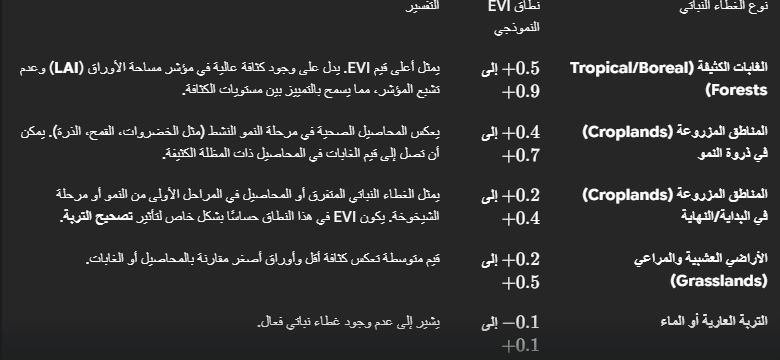
</div>

In [ ]:
!pip install eemont

In [ ]:
import ee
import geemap
import eemont

In [ ]:
# Authenticate and initialize Earth Engine
ee.Authenticate()

ee.Initialize(project = 'ee-nouribrahim25')

In [ ]:
coors = [[30.305788, 30.178518],
    [30.305788, 30.237858],
    [30.419943, 30.237858],
    [30.419943, 30.178518],
    [30.305788, 30.178518]]

In [ ]:
aoi = ee.Geometry.Polygon(coors)
aoi

In [ ]:
#Date Range
start_date = '2025-01-01'
end_date   = '2025-02-01'

In [ ]:
# Sentinel-2 with eemont
sen2 = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
      .filterBounds(aoi)
      .filterDate(start_date , end_date)
      .maskClouds()                             # Cloud/shadow masking
      .scaleAndOffset()                         # Apply scale/offset
      .spectralIndices("EVI")                  # Calculate the index
      .mean()
      .clip(aoi)
)

In [ ]:
# Landsat 8 with eemont
land8 = (
    ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
    .filterDate(start_date, end_date)
    .filterBounds(aoi)
    .maskClouds()
    .scaleAndOffset()
    .spectralIndices('EVI')
    .mean()
    .clip(aoi)
)


In [ ]:
# visulization parameters
vis_evi = {'min': 0.0, 'max': 0.8, 'palette': [
        'lightyellow',   # Bare soil / very low vegetation
        'palegreen',     # Sparse vegetation
        'yellowgreen',   # Moderate vegetation
        'green',         # Healthy vegetation
        'darkgreen'      # Dense / very healthy vegetation
    ]}


In [ ]:
Map = geemap.Map(width = 800)
Map.centerObject(aoi, 12)

In [ ]:
# Sentinel-2 layer
Map.addLayer(sen2.select('EVI'), vis_evi, 'EVI Sentinel-2')
# Landsat 8 layer
Map.addLayer(land8.select('EVI'), vis_evi, 'EVI Landsat 8')

Map.add_colorbar(
    vis_params=vis_evi,
    label='EVI (Low vegetation → Dense vegetation)',
    orientation='horizontal')

Map